In [31]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

#### Definition of Pearson's and Spearman's correlations

For any real random variable $X$, the mean is $ \mu(X) = \mathbb{E}(X)$, the variance is $\sigma(X)^2=\mathbb{E}\left((X-\mu(X))^2\right)$. Now for any pairs of real random variables $(X,Y)$, the correlation is 
$$ \rho(X,Y) = \frac{\mathbb{E}\left((X-\mu(X))(Y-\mu(Y))\right)}{\sigma(X)\sigma(Y)}.$$

In practice, you have a collection of indepedant idendically distributed (iid) realizations (called samples) of the random variables $(X,Y)$. These are $(x_1,...,x_N)$ and $(y_1,...,y_N)$ from which you can estimate $\mu,\sigma,\rho$ using empirical estimators (average of samples, average of centered squared samples, etc.). Now, that you have lists you can reorder these which corresponds to computing the ranks $(rk(x_i), rk(y_i))$ of each sample. You can interpret these samples as iid realizations of two new random variables denoted $(R_X, R_Y)$.

The Spearman's rank correlation of $(X,Y)$ is
$$S_p(X,Y) = \rho(R_X,R_Y).$$

So mathematics are silly, Spearman's rank correlation is defined as the Pearson's correlation of the ranks of the samples of $X$ and $Y$. Then, you're right the interpretations of Spearman's and Pearson's are different. These values don't tell you the same things. Pearson's is measuring the 'quality' of a linear relationship between $X$ and $Y$ while Spearman's is measuring the quality of a linear relationship between the ranks $R_X$ and $R_Y$. For example, if $X$ and $Y$ have a non-linear but monotonic relationship they would have a high Spearman's correlation and a small Pearson's correlation. If you can specifically guess the monotonic relationship between $X$ and $Y$, it means you have a model and you can write something like $Y=f(X)+N$ where $f$ is a monotonic function and $N$ is a noise random variable. Then you will end up with a high Pearson's correlation between $f(X)$ and $Y$.

Now, I'd like to show you some numerical examples of Pearson's correlations between non-Gaussian random variables. Specifically, the ones you mentionned in your e-mail (binomial, Poisson). You'll see that your interpretation is still applying to these distributions. The reason is that they are unimodal distributions and often (sufficiently-)well approximated by a Gaussian distribution. If you observe multimodal distributions, the Pearson's correlation is getting more difficult to interpret.

In [32]:
## Let's start with Gaussian variables
N = 10000 # number of samples
xi = st.norm.rvs(size=N) # samples of X
yi = st.norm.rvs(size=N) # samples of Y
zi=np.array([xi,yi]) # considere vector with coordinate xi,yi

# let's correlate xi and yi
A = np.array([[2.0,1.5],[1.5,0.5]]) # the covariance matrix is C=AA^T=[[σ(X)^2,ρ(X,Y)],[ρ(X,Y),σ(Y)^2]]
zi_cor = A@zi

 True covariance
 [[6.25 3.75]
 [3.75 2.5 ]] 
 Empirical covariance
 [[6.27 3.77]
 [3.77 2.52]]
The empirical covariance is close to the true covariance
The histogram of $x_i$ is close to a Gaussian


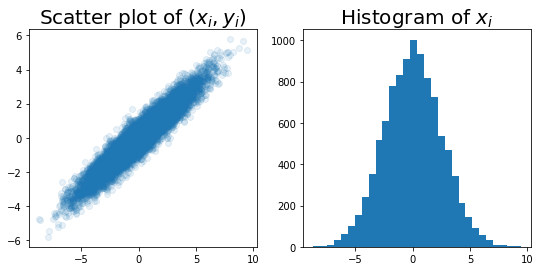

In [33]:
fig, ax = plt.subplots(1,2,figsize=(9,4))
ax[0].scatter(zi_cor[0],zi_cor[1], alpha=0.1)
ax[1].hist(zi_cor[0], bins=30)

ax[0].set_title('Scatter plot of $(x_i,y_i)$', fontsize=20)
ax[1].set_title('Histogram of $x_i$', fontsize=20)

hatC = zi_cor@zi_cor.T/N
C = A@A.T
print(' True covariance\n',C,'\n','Empirical covariance\n',np.round(hatC,2))
print('The empirical covariance is close to the true covariance')
print(r'The histogram of $x_i$ is close to a Gaussian')
del(xi,yi,zi,zi_cor)

In [35]:
## Binomial variables
N = 10000 # number of samples
n, p = 20, 0.4 # parameters of the Binomial
xi = st.binom.rvs(n=n, p=p, size=N) # samples of X
yi = st.binom.rvs(n=n, p=p, size=N) # samples of Y
zi=np.array([xi,yi], dtype=float) # considere vector with coordinate xi,yi
zi-= zi.mean(1, keepdims=True) # here we need to center the samples

# let's correlate xi and yi
A = np.array([[2.0,1.5],[1.5,0.5]]) 
zi_cor = A@zi

 True covariance
 [[6.25 3.75]
 [3.75 2.5 ]] 
 Empirical covariance
 [[40.39 24.28]
 [24.28 16.23]]
The histogram of $x_i$ is not exactly Gaussian but not so far


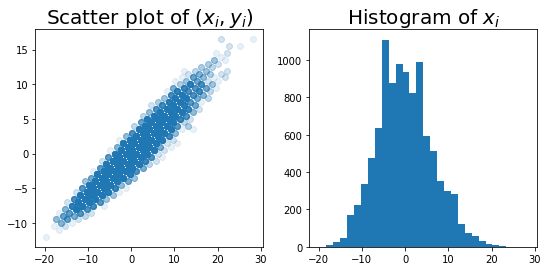

In [39]:
fig, ax = plt.subplots(1,2,figsize=(9,4))
ax[0].scatter(zi_cor[0],zi_cor[1], alpha=0.1)
ax[1].hist(zi_cor[0], bins=30)

ax[0].set_title('Scatter plot of $(x_i,y_i)$', fontsize=20)
ax[1].set_title('Histogram of $x_i$', fontsize=20)

hatC = zi_cor@zi_cor.T/N
C = A@A.T
print(' True covariance\n',C,'\n','Empirical covariance\n',np.round(hatC,2))
print(r'The histogram of $x_i$ is not exactly Gaussian but not so far')
del(xi,yi,zi,zi_cor)
# You see that now the empirical covariance hatC is different from C=AA.T because this is not Gaussian. 
# But when looking at the plot the shape of data is similar to the one above. The empirical value of the
# Pearson's correlation (17.84) still corresponds to the spread of the data.

In [40]:
## Poisson variables
N = 10000 # number of samples
mu = 6.5 # parameters of the Binomial
xi = st.poisson.rvs(mu=mu, size=N) # samples of X
yi = st.poisson.rvs(mu=mu, size=N) # samples of Y
zi=np.array([xi,yi], dtype=float) # considere vector with coordinate xi,yi
zi-= zi.mean(1, keepdims=True) # here we need to center the samples

# let's correlate xi and yi
A = np.array([[2.0,1.5],[1.5,0.5]]) 
zi_cor = A@zi

 True covariance
 [[6.25 3.75]
 [3.75 2.5 ]] 
 Empirical covariance
 [[41.53 25.12]
 [25.12 16.87]]
The histogram of $x_i$ is not exactly Gaussian but not so far


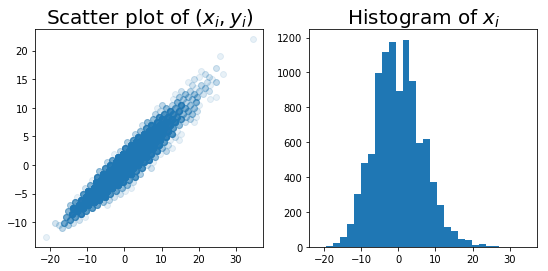

In [42]:
fig, ax = plt.subplots(1,2,figsize=(9,4))
ax[0].scatter(zi_cor[0],zi_cor[1], alpha=0.1)
ax[1].hist(zi_cor[0], bins=30);

ax[0].set_title('Scatter plot of $(x_i,y_i)$', fontsize=20)
ax[1].set_title('Histogram of $x_i$', fontsize=20)

hatC = zi_cor@zi_cor.T/N
C = A@A.T
print(' True covariance\n',C,'\n','Empirical covariance\n',np.round(hatC,2))
print(r'The histogram of $x_i$ is not exactly Gaussian but not so far')
del(xi,yi,zi,zi_cor)
# Similar conclusion as for binomial !